In [1]:
import numpy as np
import pandas as pd
import scipy

from scipy import signal as signal
from math import *
from matplotlib import pyplot as plt
import scipy.io
import os
import scipy.io.wavfile as wav

from scipy.fftpack import fft
from scipy.signal import lfilter

from scipy.stats import signaltonoise as snr

In [2]:
##Function to convert the mat lab data into csv for pandas

def convert_to_CSV(data,filename):
    for i in data:
        if '__' not in i and 'readme' not in i:
            np.savetxt((filename+".csv"),data[i],delimiter=',')

In [3]:
#scipy to load matlab files
#takes in matlab file path name
def load(matlabfile):
    matdata = scipy.io.loadmat(matlabfile)
    data = matdata['data']
    return data

In [4]:
#normal plotting function
#takes in data we want to plot, name of the file
#saves it as a png file
def plot(data, filename):
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(data)
    plt.show()
    plt.savefig(filename+".png",bbox_inches='tight')

In [5]:
#butter filter
#data is the thing we want to filter
#to edit the params of the butter filter, change the function variables inside here
def butter(data , filename):
    N = "<class 'numpy.int16'>"
    b, a = signal.butter(20, .3, 'low', analog=False)#our defult values
    if (str(type(data[0])) == N):
        filtered = signal.filtfilt(b, a, data, method='gust')#applying the filter for single channel
    else:
        filtered = signal.filtfilt(b, a, data.T[0], method='gust')#applying the filter 2 channels
    fil = filtered.astype(np.int16)
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(fil)
    plt.savefig("Butter_"+filename+".png",bbox_inches='tight')
    plt.show()
    return fil 

In [6]:
#butter filter n times
#plt.figure(figsize=(20,10))##change the size of the charts
#plt.plot(fil)
#plt.show()
#plt.savefig("Butter_"+filename+".png",bbox_inches='tight')

def nbutter(data, n, filename):
    def Butter(data):
        N = "<class 'numpy.int16'>"
        b, a = signal.butter(20, .3, 'low', analog=False)#our defult values
        if (str(type(data[0])) == N):
            filtered = signal.filtfilt(b, a, data, method='gust')#applying the filter for single channel
        else:
            filtered = signal.filtfilt(b, a, data.T[0], method='gust')#applying the filter 2 channels
        fil = filtered.astype(np.int16)
        return fil
    for i in range(n):
        data = Butter(data)
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(data)
    plt.savefig("Butter_"+filename+".png",bbox_inches='tight')
    plt.show()
    return data


In [7]:
#weiner
def wiener(data, filename):
    fil = signal.wiener(data, mysize = 3)
    fil = fil.astype(np.int16)
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(fil)
    plt.show()
    
    return fil

In [8]:
#cheby1
def cheby1(data , filename):
    N = "<class 'numpy.int16'>"
    b, a = signal.cheby1(20, 3, .3, 'low',analog= False, output='ba')#our defult values
    if (str(type(data[0])) == N):
        filtered = signal.filtfilt(b, a, data, method='gust')#applying the filter
    else:
        filtered = signal.filtfilt(b, a, data.T[0], method='gust')#applying the filter
    fil = filtered.astype(np.int16)
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(fil)
    plt.savefig("cheby1_"+filename+".png",bbox_inches='tight')
    plt.show()
    
    return fil 

In [9]:
#ncheby1
def ncheby1(data, n, filename):
    
    def Cheby1(data):
        N = "<class 'numpy.int16'>"
        b, a = signal.cheby1(20, 3, .3, 'low',analog= False, output='ba')#our defult values
        if (str(type(data[0])) == N):
            filtered = signal.filtfilt(b, a, data, method='gust')#applying the filter
        else:
            filtered = signal.filtfilt(b, a, data.T[0], method='gust')#applying the filter
        fil = filtered.astype(np.int16)
        return fil
    for i in range(n):
        data = Cheby1(data)
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(data)
    plt.savefig("ncheby1_"+filename+".png",bbox_inches='tight')
    plt.show()
    return data



In [10]:
#butter-cheby1
#runs butter then cheby on the data
def butter_cheby1(data, filename):
    def Cheby1(data):
        N = "<class 'numpy.int16'>"
        b, a = signal.cheby1(20, 3, .3, 'low',analog= False, output='ba')#our defult values
        if (str(type(data[0])) == N):
            filtered = signal.filtfilt(b, a, data, method='gust')#applying the filter
        else:
            filtered = signal.filtfilt(b, a, data.T[0], method='gust')#applying the filter
        fil = filtered.astype(np.int16)
        return fil
    def Butter(data):
        N = "<class 'numpy.int16'>"
        b, a = signal.butter(20, .3, 'low', analog=False)#our defult values
        if (str(type(data[0])) == N):
            filtered = signal.filtfilt(b, a, data, method='gust')#applying the filter for single channel
        else:
            filtered = signal.filtfilt(b, a, data.T[0], method='gust')#applying the filter 2 channels
        fil = filtered.astype(np.int16)
        return fil
    
    data = (Cheby1(Butter(data)))
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(data)
    plt.savefig("butter_cheby1_"+filename+".png",bbox_inches='tight')
    plt.show()
    return data

In [11]:
#cheby1_butter
#runs cheby1 then butter
def cheby1_butter(data, filename):
    def Cheby1(data):
        N = "<class 'numpy.int16'>"
        b, a = signal.cheby1(20, 3, .3, 'low',analog= False, output='ba')#our defult values
        if (str(type(data[0])) == N):
            filtered = signal.filtfilt(b, a, data, method='gust')#applying the filter
        else:
            filtered = signal.filtfilt(b, a, data.T[0], method='gust')#applying the filter
        fil = filtered.astype(np.int16)
        return fil
    def Butter(data):
        N = "<class 'numpy.int16'>"
        b, a = signal.butter(20, .3, 'low', analog=False)#our defult values
        if (str(type(data[0])) == N):
            filtered = signal.filtfilt(b, a, data, method='gust')#applying the filter for single channel
        else:
            filtered = signal.filtfilt(b, a, data.T[0], method='gust')#applying the filter 2 channels
        fil = filtered.astype(np.int16)
        return fil
    
    data = (Butter(Cheby1(data)))
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(data)
    plt.savefig("cheby1_butter_"+filename+".png",bbox_inches='tight')
    plt.show()
    return data

In [12]:
#plots fft and saves it as png
#takes in the wav file name, the name we want our png to be
def fft_fig(wavfilename, filename):
    fs, data = wav.read(wavfilename+".wav")
    a = data.T 
    b=[(ele/2**8.)*2-1 for ele in a] 
    c = fft(b) 

    plt.figure(figsize=(20,10))
    plt.axis([0,fs/2,0,abs(max(c))])
    plt.plot(abs(c),'r') 
    plt.show()
    plt.savefig(filename+".png",bbox_inches='tight')


In [13]:
#Takes in our data, saves it as a wav file
def save_wav(data, filename, FS):
    wav.write(filename+".wav", FS, data)

In [14]:
#plays the sound using os
#takes in wav file name
def play(filename):
    os.system(filename)

In [15]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [16]:
def snr(file):
        data = wav.read(file)[1]
        singleChannel = data
        norm = singleChannel / (max(np.amax(singleChannel), -1 * np.amin(singleChannel)))
        return signaltonoise(norm)

Below is just testing of the above functions

In [17]:
FS, sunny = wav.read('Sunny_Test.wav')

In [18]:
FS, carlos = wav.read('Carlos_getting_high.wav')

In [19]:
FS

44100

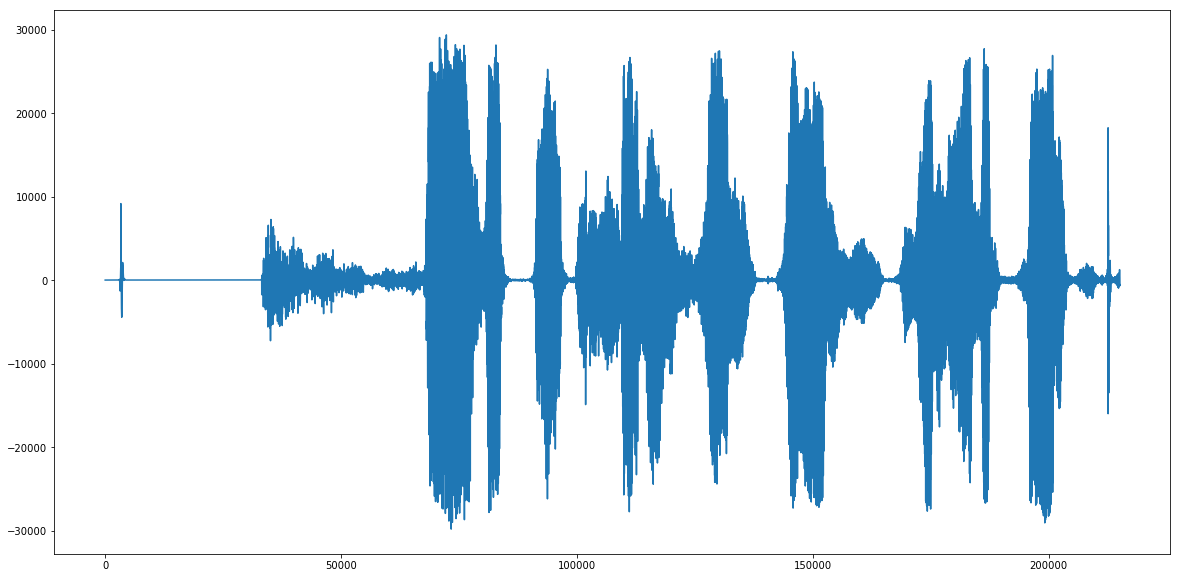

In [20]:
singlebutter = butter(carlos, 'carlos')

In [21]:
carlos

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ..., 
       [-424, -424],
       [-526, -526],
       [-417, -417]], dtype=int16)

In [22]:
singlebutter

array([   0,    0,    0, ..., -434, -487, -552], dtype=int16)

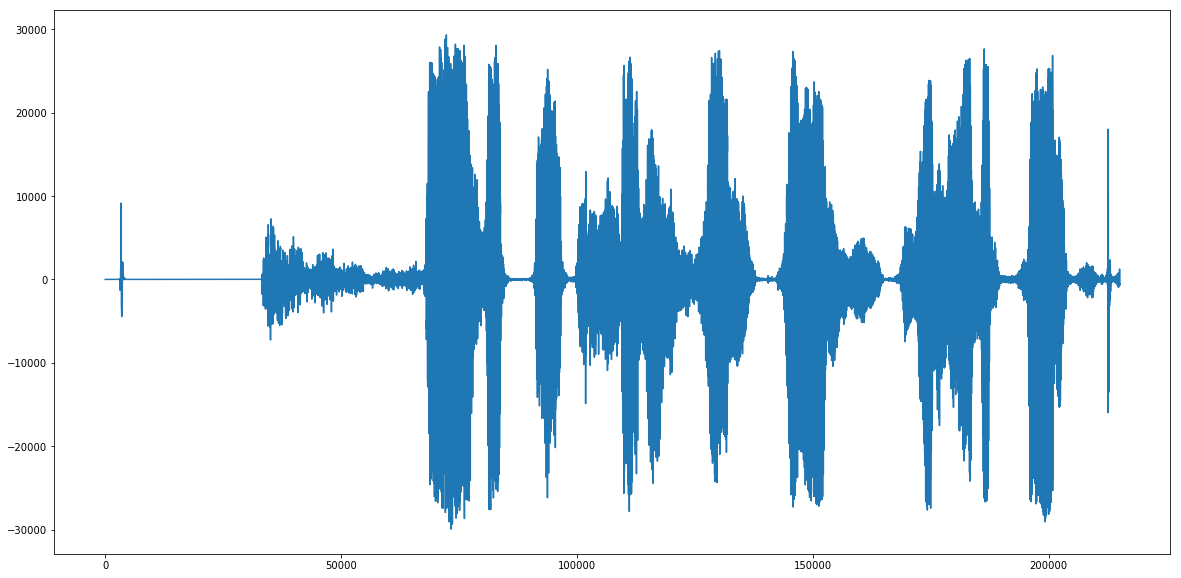

In [23]:
n_butter = nbutter(carlos, 4, 'carlos')

In [24]:
n_butter

array([   0,    0,    0, ..., -442, -521, -603], dtype=int16)

In [25]:
save_wav(n_butter, 'n_butter_5', FS)

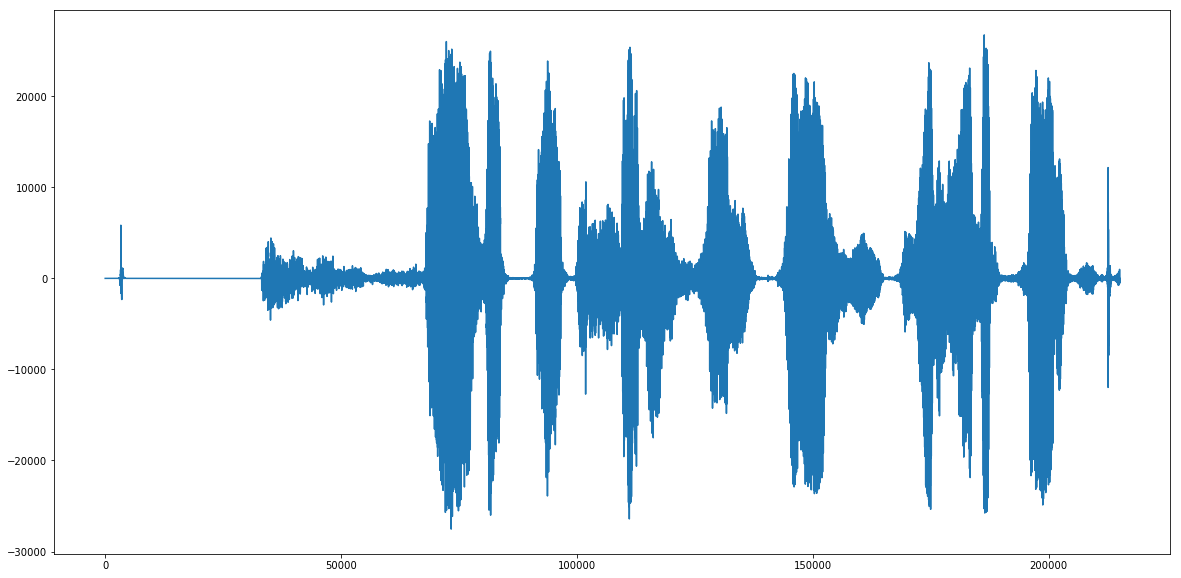

In [26]:
singlecheby1 = cheby1(carlos, 'carloscheby1')

In [27]:
singlecheby1[50000:50020]

array([-100, -143, -164, -162, -141, -113,  -85,  -59,  -28,   18,   84,
        167,  255,  338,  408,  463,  507,  539,  557,  559], dtype=int16)

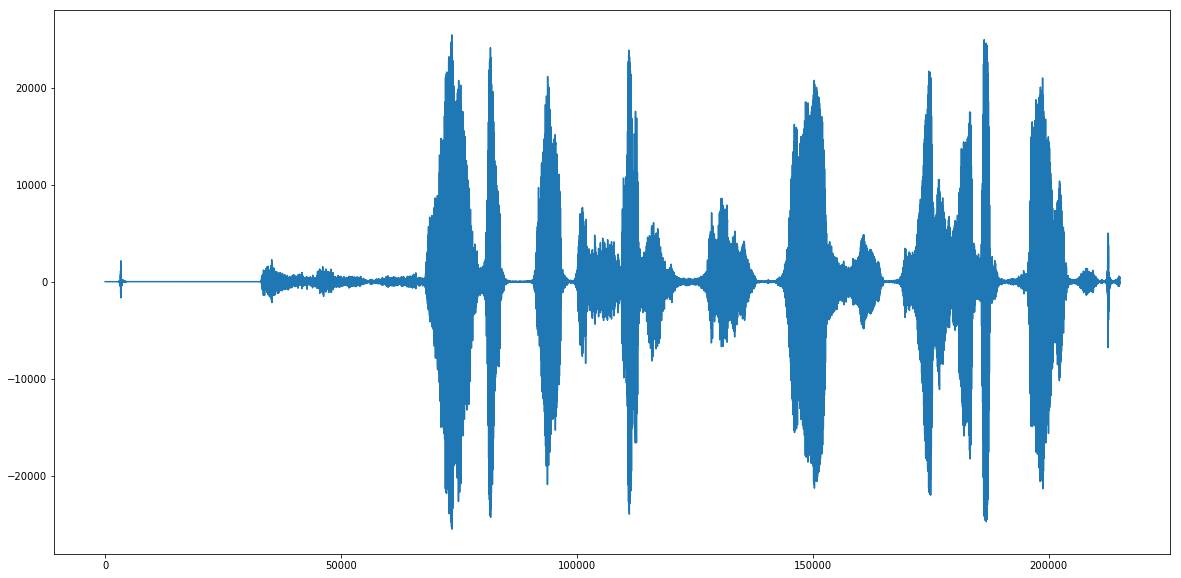

In [28]:
Ncheby1 = ncheby1(carlos, 4, 'carlosncheby') 

In [29]:
Ncheby1

array([  0,   0,   0, ..., -15,  -3,   0], dtype=int16)

In [30]:
save_wav(Ncheby1, 'Ncheby1', FS)

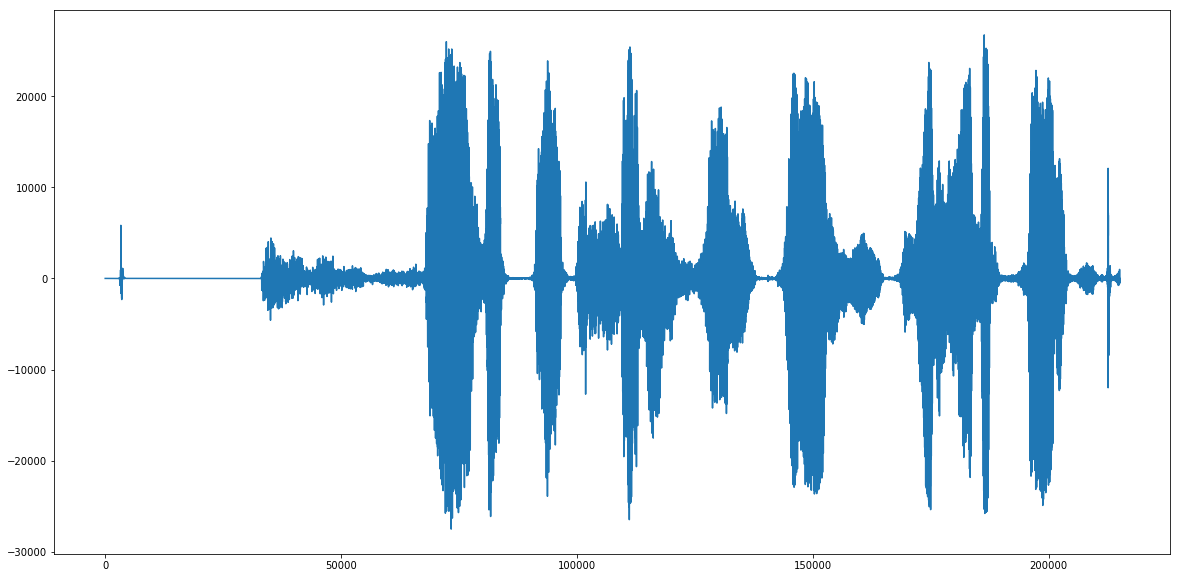

In [31]:
butter_cheby = butter_cheby1(carlos, 'butter_cheby1_carlos')

In [32]:
butter_cheby[50000:50020]

array([-100, -141, -163, -162, -143, -115,  -86,  -58,  -26,   19,   84,
        165,  253,  337,  409,  465,  507,  538,  555,  557], dtype=int16)

In [33]:
singlecheby1[50000:50020]

array([-100, -143, -164, -162, -141, -113,  -85,  -59,  -28,   18,   84,
        167,  255,  338,  408,  463,  507,  539,  557,  559], dtype=int16)

In [34]:
save_wav(butter_cheby, 'butter_cheby', FS)

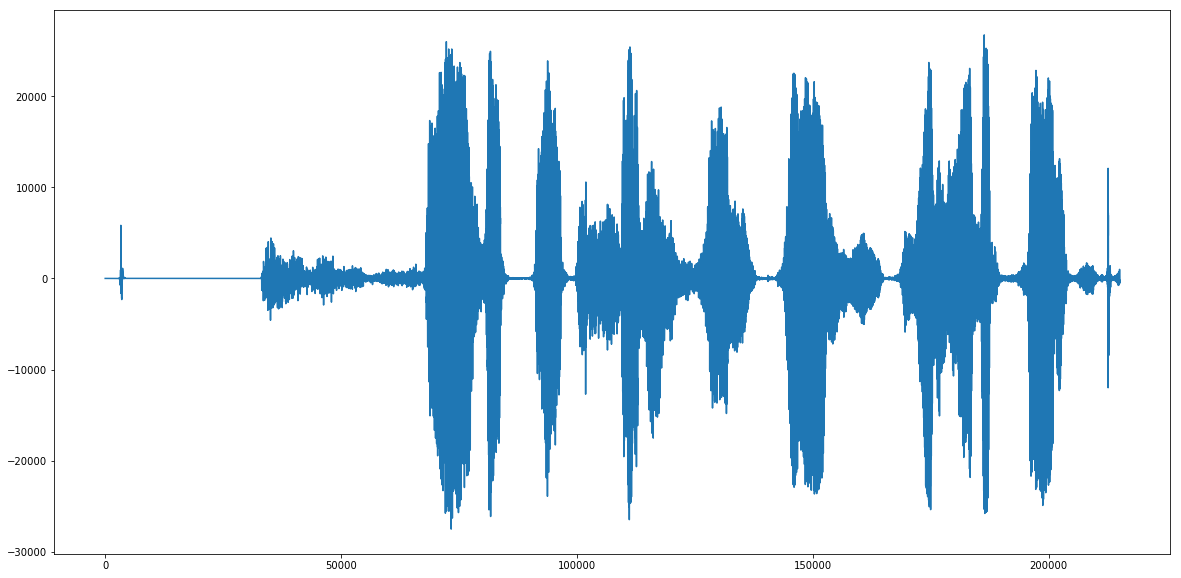

In [35]:
cheby_butter = cheby1_butter(carlos, 'cheby1_butter_carlos')

In [36]:
cheby_butter

array([   0,    0,    0, ...,   13,  -52, -196], dtype=int16)

In [37]:
save_wav(cheby_butter, 'cheby_butter', FS)

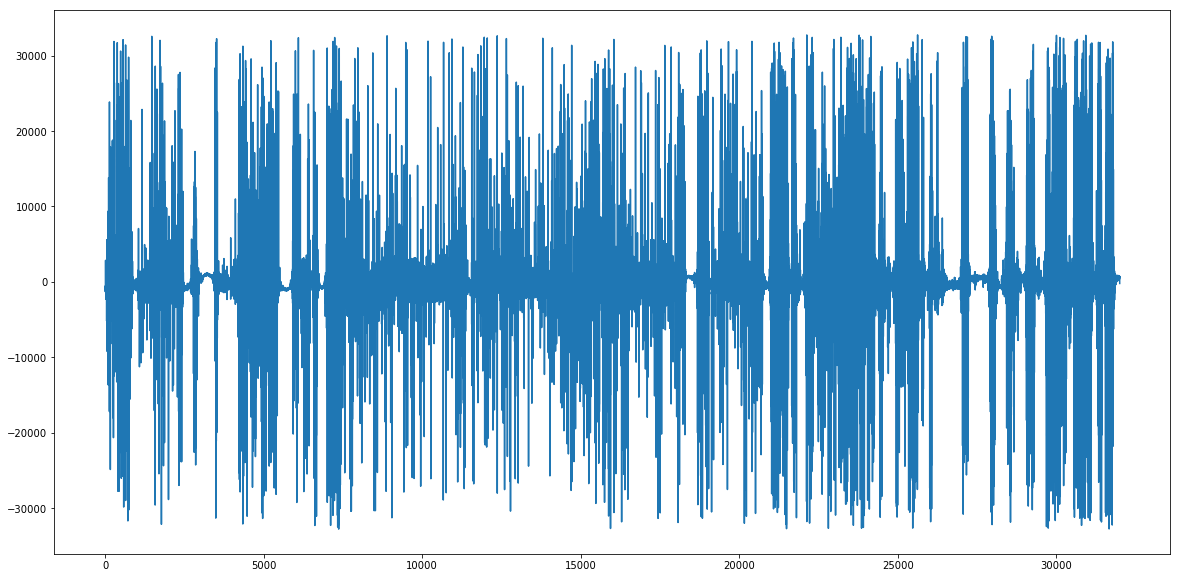

In [61]:
wf = wiener(female, female)

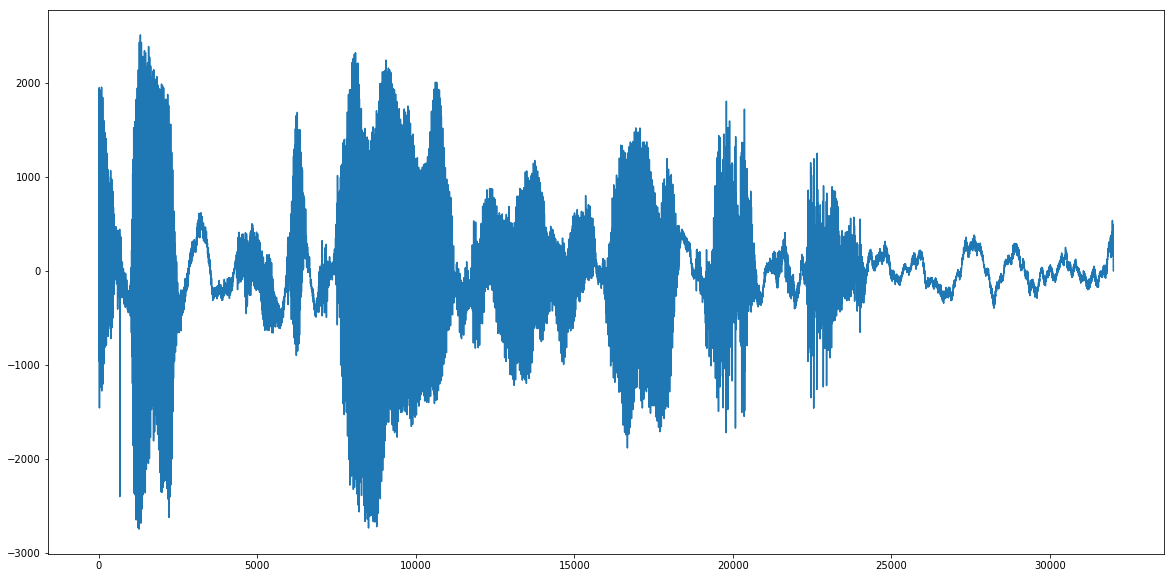

In [54]:
femalecheby = cheby1(female, 'female')

In [55]:
save_wav(femalecheby, 'femalecheby', FS)

In [62]:
save_wav(wf, 'wf', FS)

In [63]:
wfsnr = snr('wf.wav')

In [64]:
wfsnr

array(0.005720294748143938)

In [65]:
test = snr('TEST.wav')
test

array(-0.003568715437532109)